In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc, rcParams
import scipy
import re

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
"""
Single sector (Sector 12) of WASP-17b (Model C) comparison with exoplanets: WASP-39b, HAT-P-26b, HAT-P-32b with single sectors

"""

'\nSingle sector (Sector 12) of WASP-17b (Model C) comparison with exoplanets: WASP-39b, HAT-P-26b, HAT-P-32b with single sectors\n\n'

In [3]:
df = pd.read_csv("parameters.csv")#, header=None)
df = df.set_index('Parameter')

In [4]:
df

,WASP-17b,WASP-39b,HAT-P-26b,HAT-P-32b
Parameter,,,,
T_0,1630.861610663565+0.00029717062670897576-0.000...,2702.3957973500133+0.0003718749835570634-0.000...,2670.424173554393+0.0008781483138591284-0.0009...,2883.6177900335633+0.00011862964129250031-0.00...
RpRs,0.12132331355382717+0.0009057218589828414-0.00...,0.14149026038025142+0.0012659907267314197-0.00...,0.0727840928103202+0.001963566097598249-0.0026...,0.1495977792227567+0.00020492931499896394-0.00...
P,3.735457546163345+0.00005353-0.00006277,4.054861395226134+0.0001998695909275483-0.0002...,4.2343900775565935+0.000354263518044462-0.0003...,2.149984832035263+0.00001701-1.692152449939143...
i,88.05242038422188+0.8237098425502438-1.0511485...,88.49241205142391+0.5464367800084631-0.7526854...,87.41595086559371+1.5393319612684024-1.7007207...,89.51307084813853+0.4541524196908284-0.3370493...
a/R*,7.309401355606358+0.21775645687941125-0.181765...,12.056556882534395+0.487974056149481-0.4686394...,11.592504364704151+1.5751304667490036-1.397120...,6.0277563430964864+0.03765612820454667-0.03502...
e,---,---,0.12116828485016282+0.05722449180824006-0.0573...,0.015686429867747265+0.008247418786619793-0.00...
sigma,0.0008084652860793481+0.00007816-0.00010340527...,0.0011290750648156583+0.0002740331871066556-0....,0.00016801101926346246+0.00003399-0.00003398,0.0007847154829236353+0.00008914-0.00011703217...
rho,0.19044211595490584+0.027793919426255725-0.034...,1.47932138724324+0.48585198588824985-0.8306401...,0.11912357198489529+0.047907160668278936-0.240...,0.5295657120072492+0.06476360063362813-0.08134...
transits,5,3,3,13


In [5]:
df_ref_list = df.columns

df_T_0_list = df.loc['T_0']
df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
# df_R_list = df.loc['R'] #Planetary radius row
# df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']
df_sigma_list = df.loc['sigma']
df_rho_list = df.loc['rho']
df_transits_list = df.loc['transits']

T_0_list, T_0_ref_list = read_df_params(df_T_0_list, df_ref_list)
e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
# R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
# a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)
sigma_list, sigma_ref_list = read_df_params(df_sigma_list, df_ref_list)
rho_list, rho_ref_list = read_df_params(df_rho_list, df_ref_list)
transits_list, transits_ref_list = read_df_params(df_transits_list, df_ref_list)

In [6]:
# y_list = range(0, len(P_ref_list))

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4,8))

# """
# Period
# """
# ax1.set_title("Constraint")


# for obj, author, y in zip(P_list, P_ref_list, y_list):
#     mu, upper, lower = obj
#     sigma = max(abs(upper), abs(lower))
#     colour = df[author]['colour']
#     ax1.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

# ax1.set_ylim(-0.00038, 0.00038)

# ax1.set_ylabel(r"Period (days)")

# ax1.set_xticklabels([])
# ax1.tick_params(axis="x", which="both", direction="in")

# # Mirror y
# ax1y = ax1.twinx()
# ax1y.set_ylim(ax1.get_ylim())
# ax1y.get_yaxis().set_ticklabels([])
# ax1y.tick_params(which="both", direction="in")

# # Mirror x
# ax1x = ax1.twiny()
# ax1x.set_xlim(ax1.get_xlim())
# ax1x.get_xaxis().set_ticklabels([])
# ax1x.tick_params(which="both", direction="in")

# # ax1x.set_xlabel("Planet")


# """
# RpRs
# """

# for obj, author, y in zip(RpRs_list, RpRs_ref_list, y_list):
#     mu, upper, lower = obj
#     sigma = max(abs(upper), abs(lower))
#     colour = df[author]['colour']
#     ax2.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# # plt.xlim(-0.005, 0.005)

# ax2.set_ylabel(r"$R_{p}/R_{*}$")

# ax2.set_xticklabels([])

# # Mirror y
# ax2y = ax2.twinx()
# ax2y.set_ylim(ax2.get_ylim())
# ax2y.get_yaxis().set_ticklabels([])
# ax2y.tick_params(which="both", direction="in")

# # Mirror x
# ax2x = ax2.twiny()
# ax2x.set_xlim(ax2.get_xlim())
# ax2x.get_xaxis().set_ticklabels([])
# ax2x.tick_params(which="both", direction="in")



# # yticklabels = ([r'{:.4f}'.format(i) for i in ax1.get_yticks()])
# # yticklabels[4] = u"\u03bc"
# # ax1.set_yticklabels(yticklabels)
# ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
# ax2.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

# ax1.set_xticks(y_list)
# ax1x.set_xticks(y_list)
# ax2.set_xticks(y_list)
# ax2x.set_xticks(y_list)
# ax2.set_xticklabels(df_ref_list)



# # ax.legend()
# # fig.tight_layout()
# plt.subplots_adjust(hspace=0.07)
# plt.show()

In [7]:
# y_list = range(0, len(e_ref_list))

# fig, ax = plt.subplots(1, figsize=(8,6))

# for obj, author, y in zip(P_list, P_ref_list, y_list):
#     mu, upper, lower = obj
#     sigma = max(abs(upper), abs(lower))
#     colour = df[author]['colour']
#     plt.errorbar(0, y, xerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# # plt.xlim(-0.005, 0.005)
# plt.xlabel(r"Eccentricity")
# plt.ylabel("Planet")

# ax.set_yticks(y_list)
# ax.set_yticklabels(e_ref_list)

# # ax.legend()
# plt.show()


HAT-P-32b 2883.6177900335633 0.00011862964129250031 10.249601007672027
HAT-P-26b 2670.424173554393 0.0008781483138591284 75.8720143174287
WASP-39b 2702.3957973500133 0.0003718749835570634 32.12999857933028
WASP-17b 1630.861610663565 0.00029717062670897576 25.675542147655506


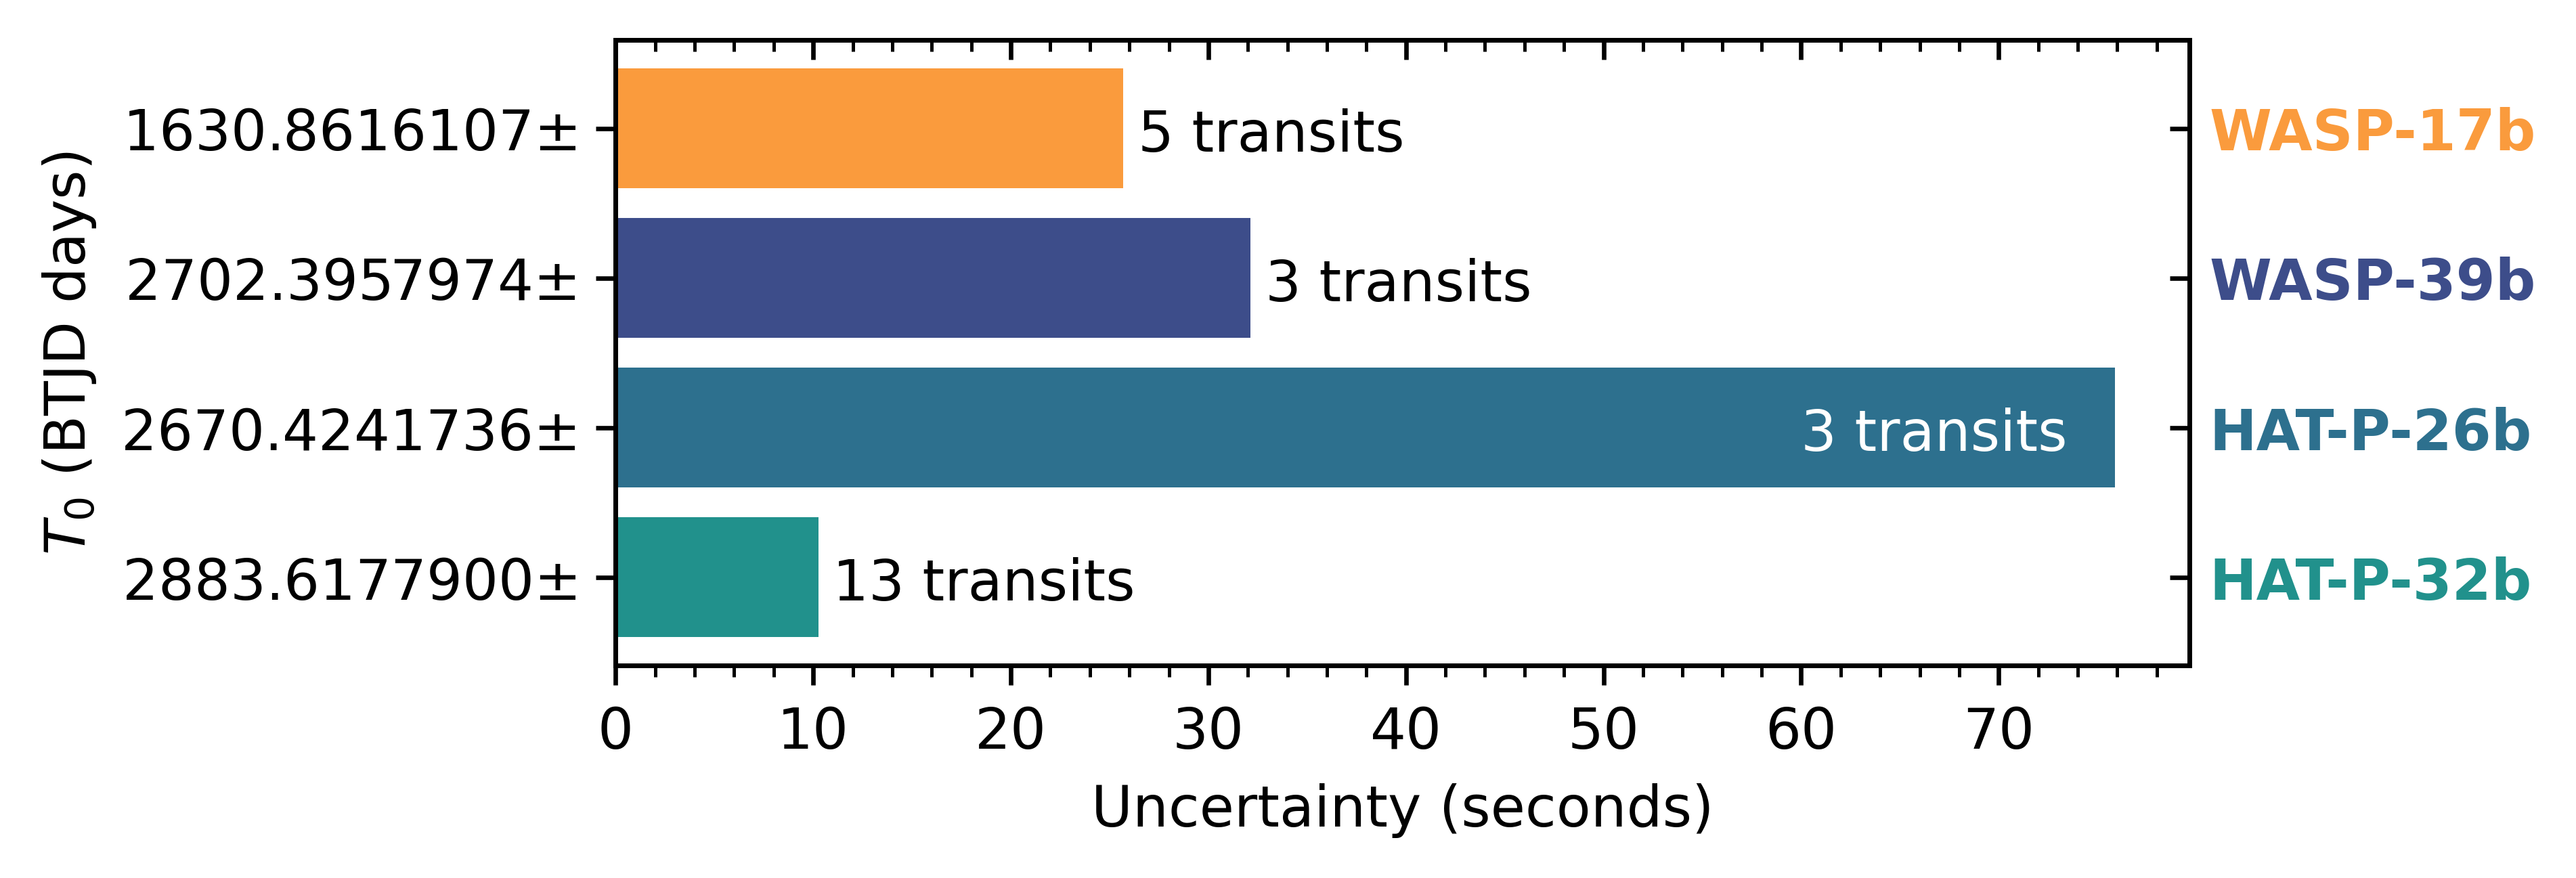

In [8]:
y_list = range(0, len(T_0_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list=[]
T_0_obj = np.concatenate((T_0_list, np.vstack(T_0_ref_list)), axis=1, dtype=object)[::-1]
# T_0_obj = T_0_obj[T_0_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in T_0_obj:
    sigma = max(abs(upper), abs(lower)) * 86400
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "HAT-P-26b":
        ax.text(60, (y-0.15), transit_text, color="white")
    else:
        ax.text(sigma+0.75 , (y-0.15), transit_text)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)
    y += 1

ax.set_ylabel(r'$T_{0}$ (BTJD days)')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('Uncertainty (seconds)')

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

HAT-P-32b 2.149984832035263 1.701e-05 1.469664
HAT-P-26b 4.2343900775565935 0.000354263518044462 30.608367959041516
WASP-39b 4.054861395226134 0.0001998695909275483 17.268732656140173
WASP-17b 3.735457546163345 5.353e-05 4.624992


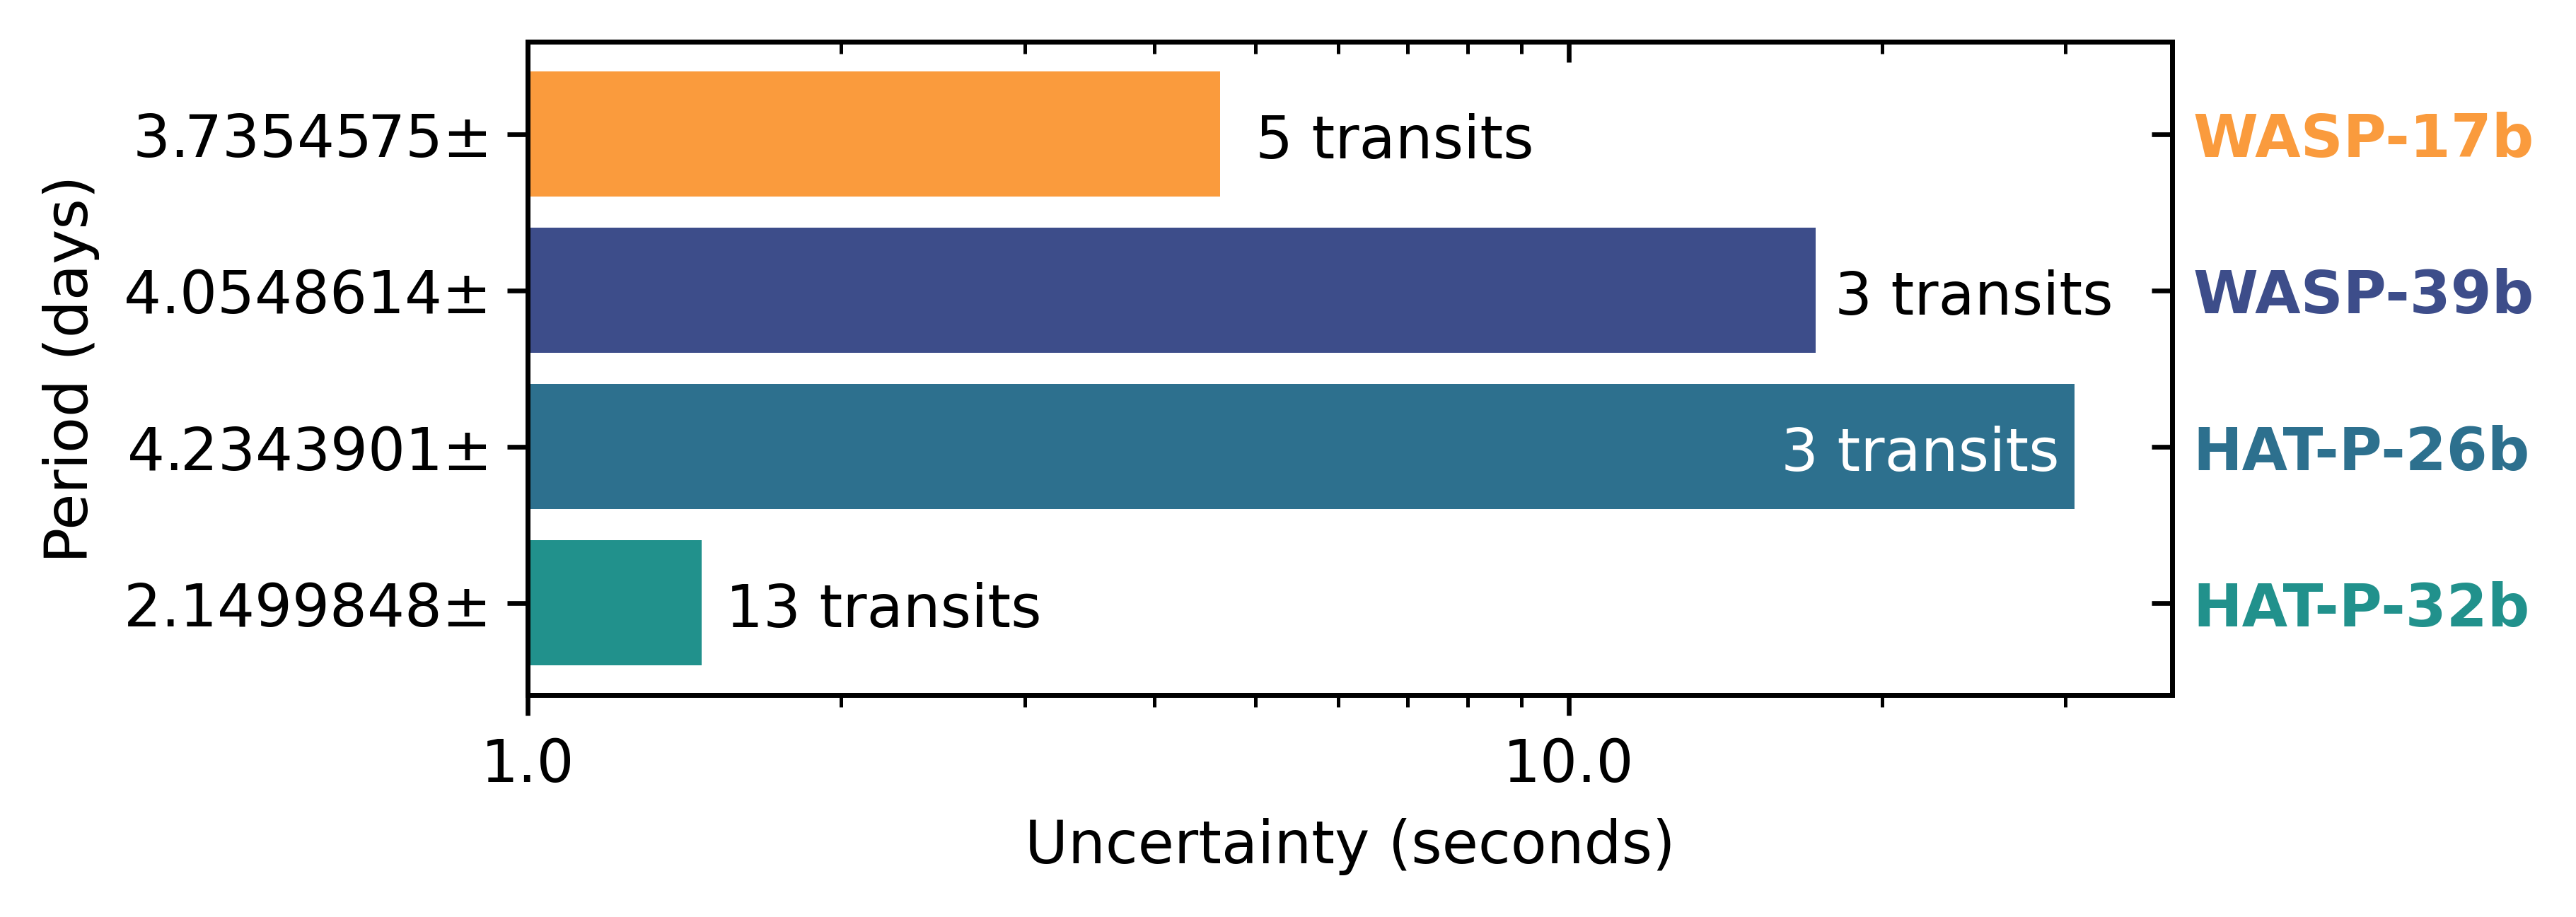

In [9]:
y_list = range(0, len(P_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list=[]
P_obj = np.concatenate((P_list, np.vstack(P_ref_list)), axis=1, dtype=object)[::-1]
# P_obj = P_obj[P_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in P_obj:
    sigma = max(abs(upper), abs(lower)) * 86400
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "HAT-P-26b":
        ax.text(16, (y-0.15), transit_text, color="white")
    elif author == "HAT-P-32b":
        ax.text(1.55, (y-0.15), transit_text)
    elif author == "WASP-17b":
        ax.text(5, (y-0.15), transit_text)
    elif "WASP-39b":
        ax.text(18 , (y-0.15), transit_text)
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)
    y+=1

ax.set_xlabel('Uncertainty (seconds)')
ax.set_ylabel("Period (days)")


ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())
ax.set_xlim(1.0, 38)

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)


# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.set_xscale('log')
axx.get_xaxis().set_ticklabels([])



plt.show()

HAT-P-26b 0.0727840928103202 0.001963566097598249
WASP-17b 0.12132331355382717 0.0009057218589828414
WASP-39b 0.14149026038025142 0.0012659907267314197
HAT-P-32b 0.1495977792227567 0.00020492931499896394


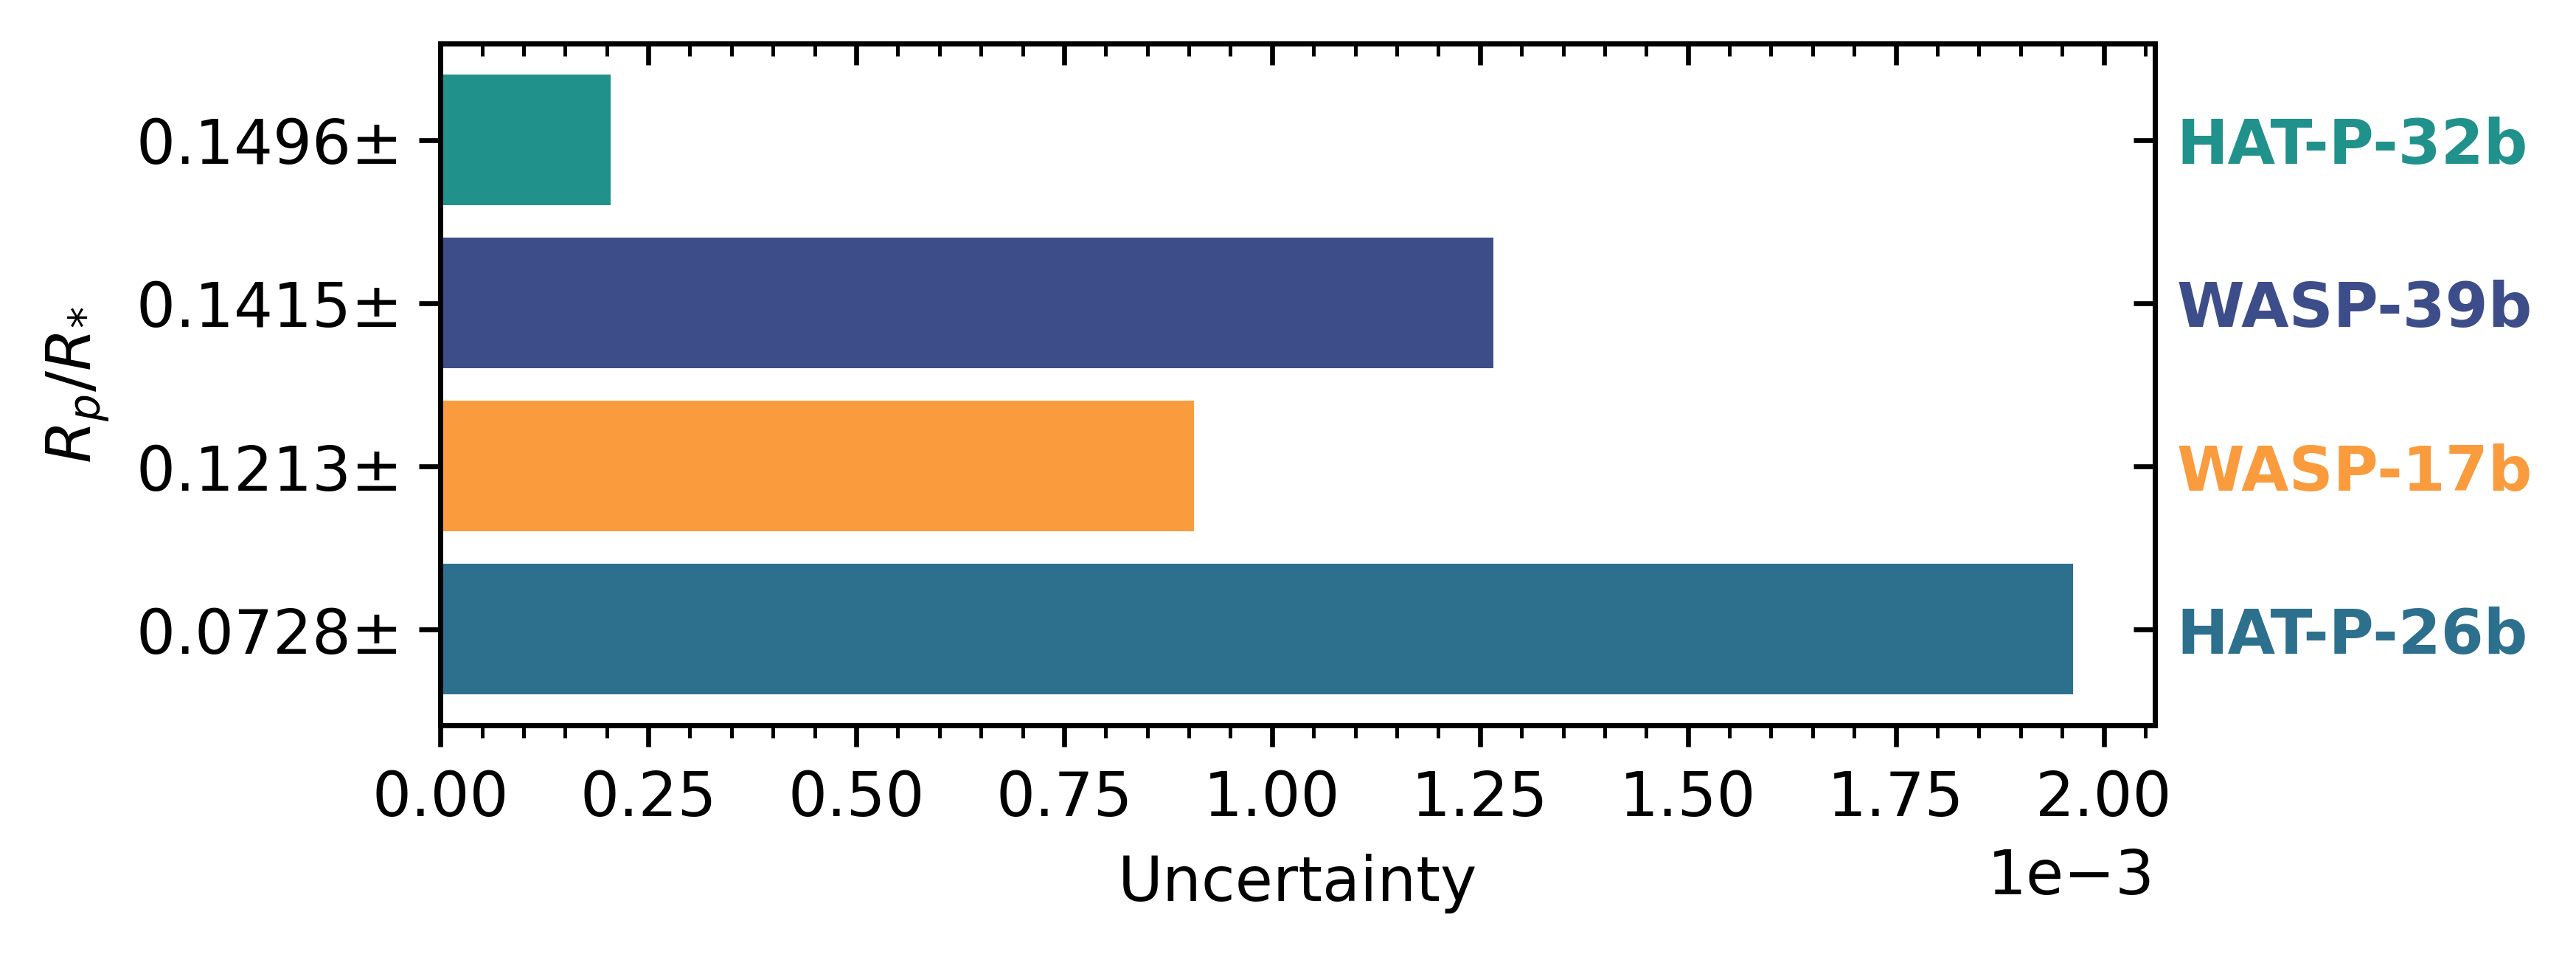

In [10]:
y_list = range(0, len(RpRs_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list = []

RpRs_obj = np.concatenate((RpRs_list, np.vstack(RpRs_ref_list)), axis=1, dtype=object)
RpRs_obj = RpRs_obj[RpRs_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in RpRs_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.4f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)
    y += 1

ax.set_ylabel(r'$R_{p}/R_{*}$')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)


# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

HAT-P-26b 87.41595086559371 1.5393319612684024
WASP-17b 88.05242038422188 0.8237098425502438
WASP-39b 88.49241205142391 0.5464367800084631
HAT-P-32b 89.51307084813853 0.4541524196908284


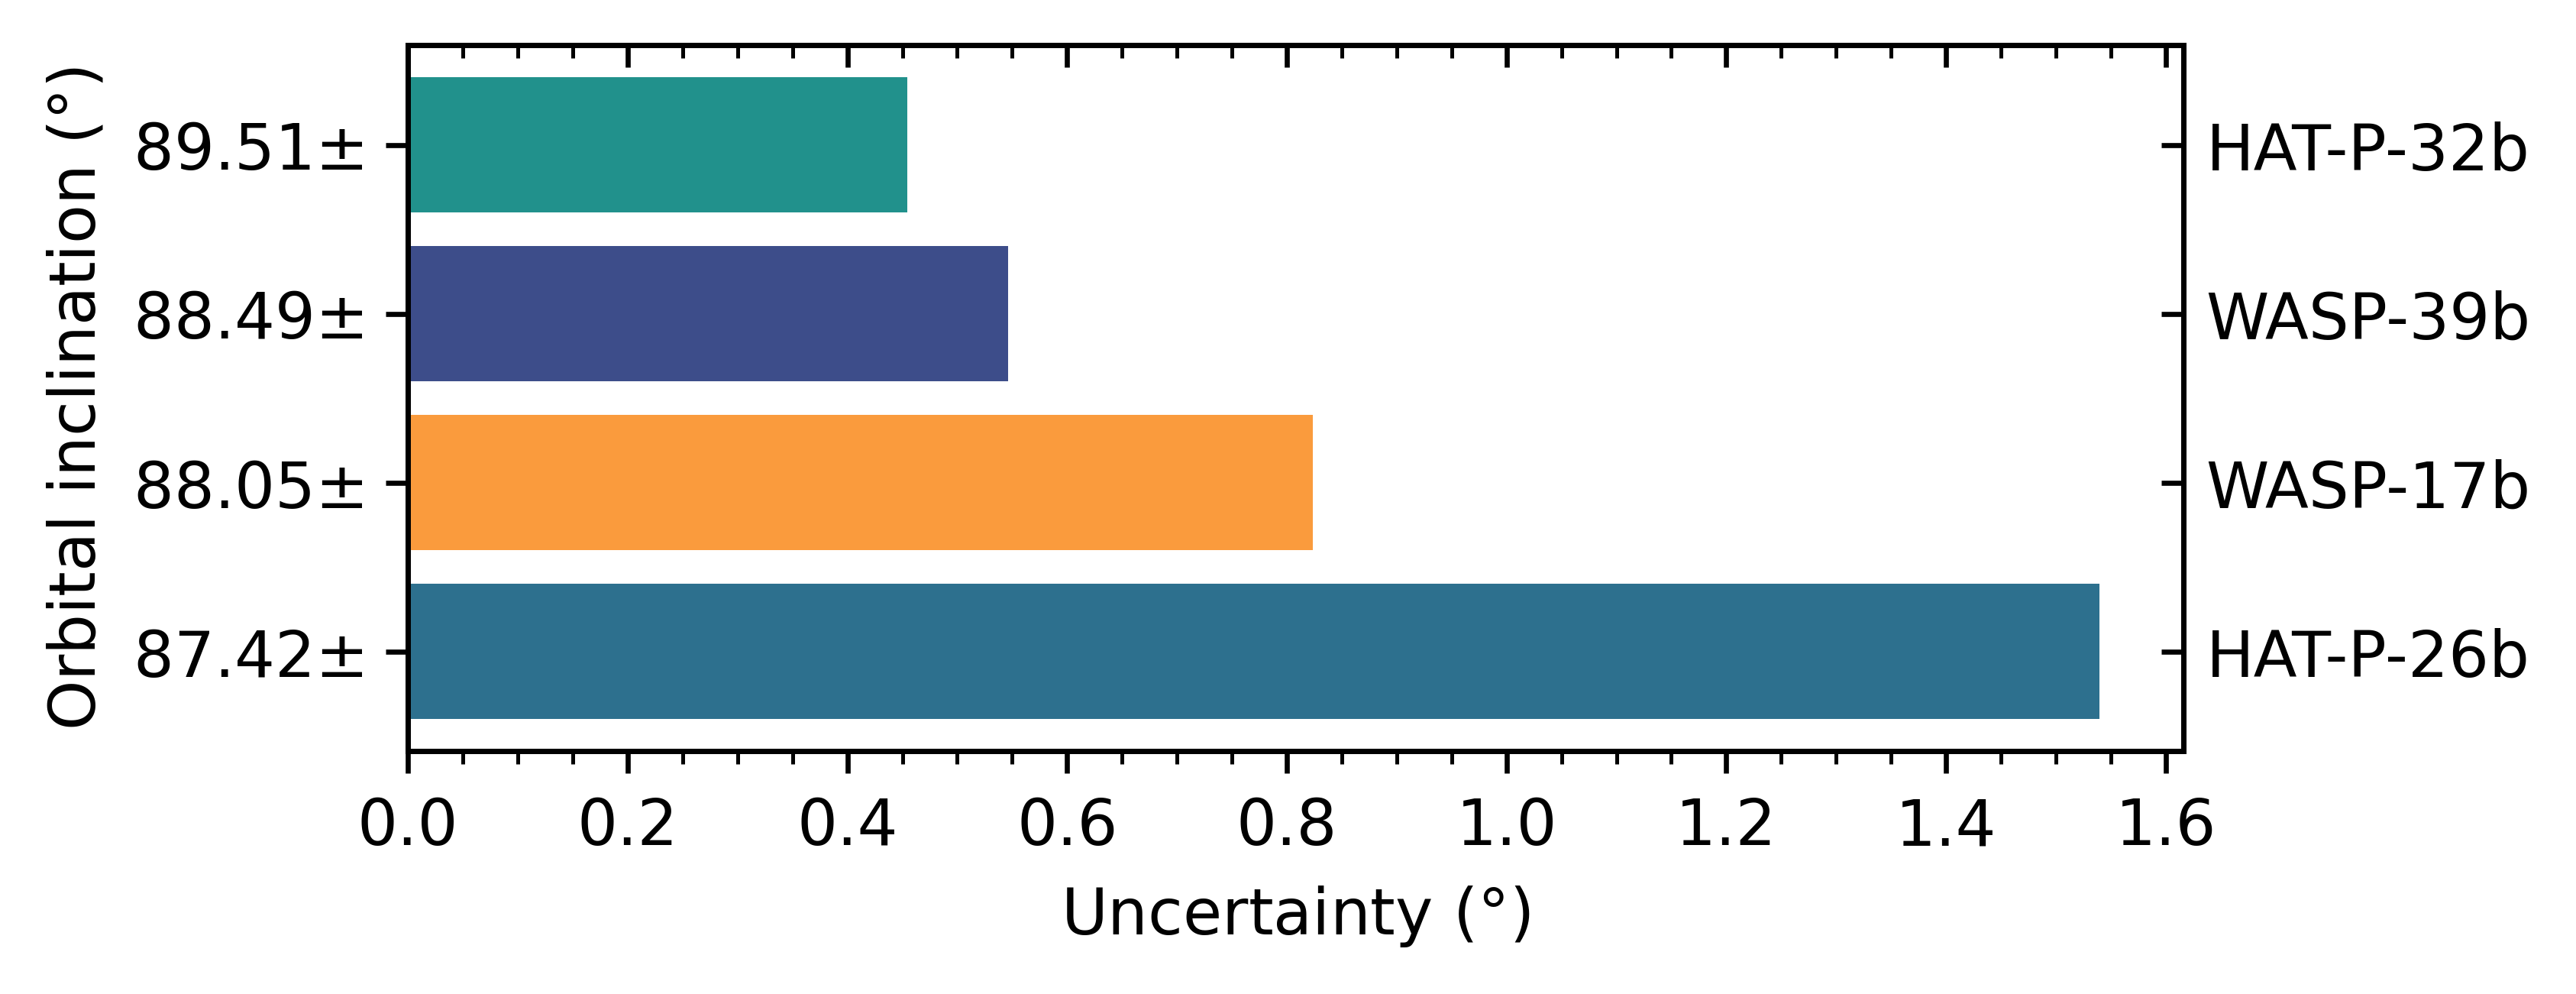

In [11]:
y_list = range(0, len(i_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
i_obj = np.concatenate((i_list, np.vstack(i_ref_list)), axis=1, dtype=object)
i_obj = i_obj[i_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in i_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.2f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    y += 1

ax.set_ylabel(r'Orbital inclination ($\degree$)')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty ($\degree$)')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label)


# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

HAT-P-32b 6.0277563430964864 0.03765612820454667
HAT-P-26b 11.592504364704151 1.5751304667490036
WASP-39b 12.056556882534395 0.487974056149481
WASP-17b 7.309401355606358 0.21775645687941125


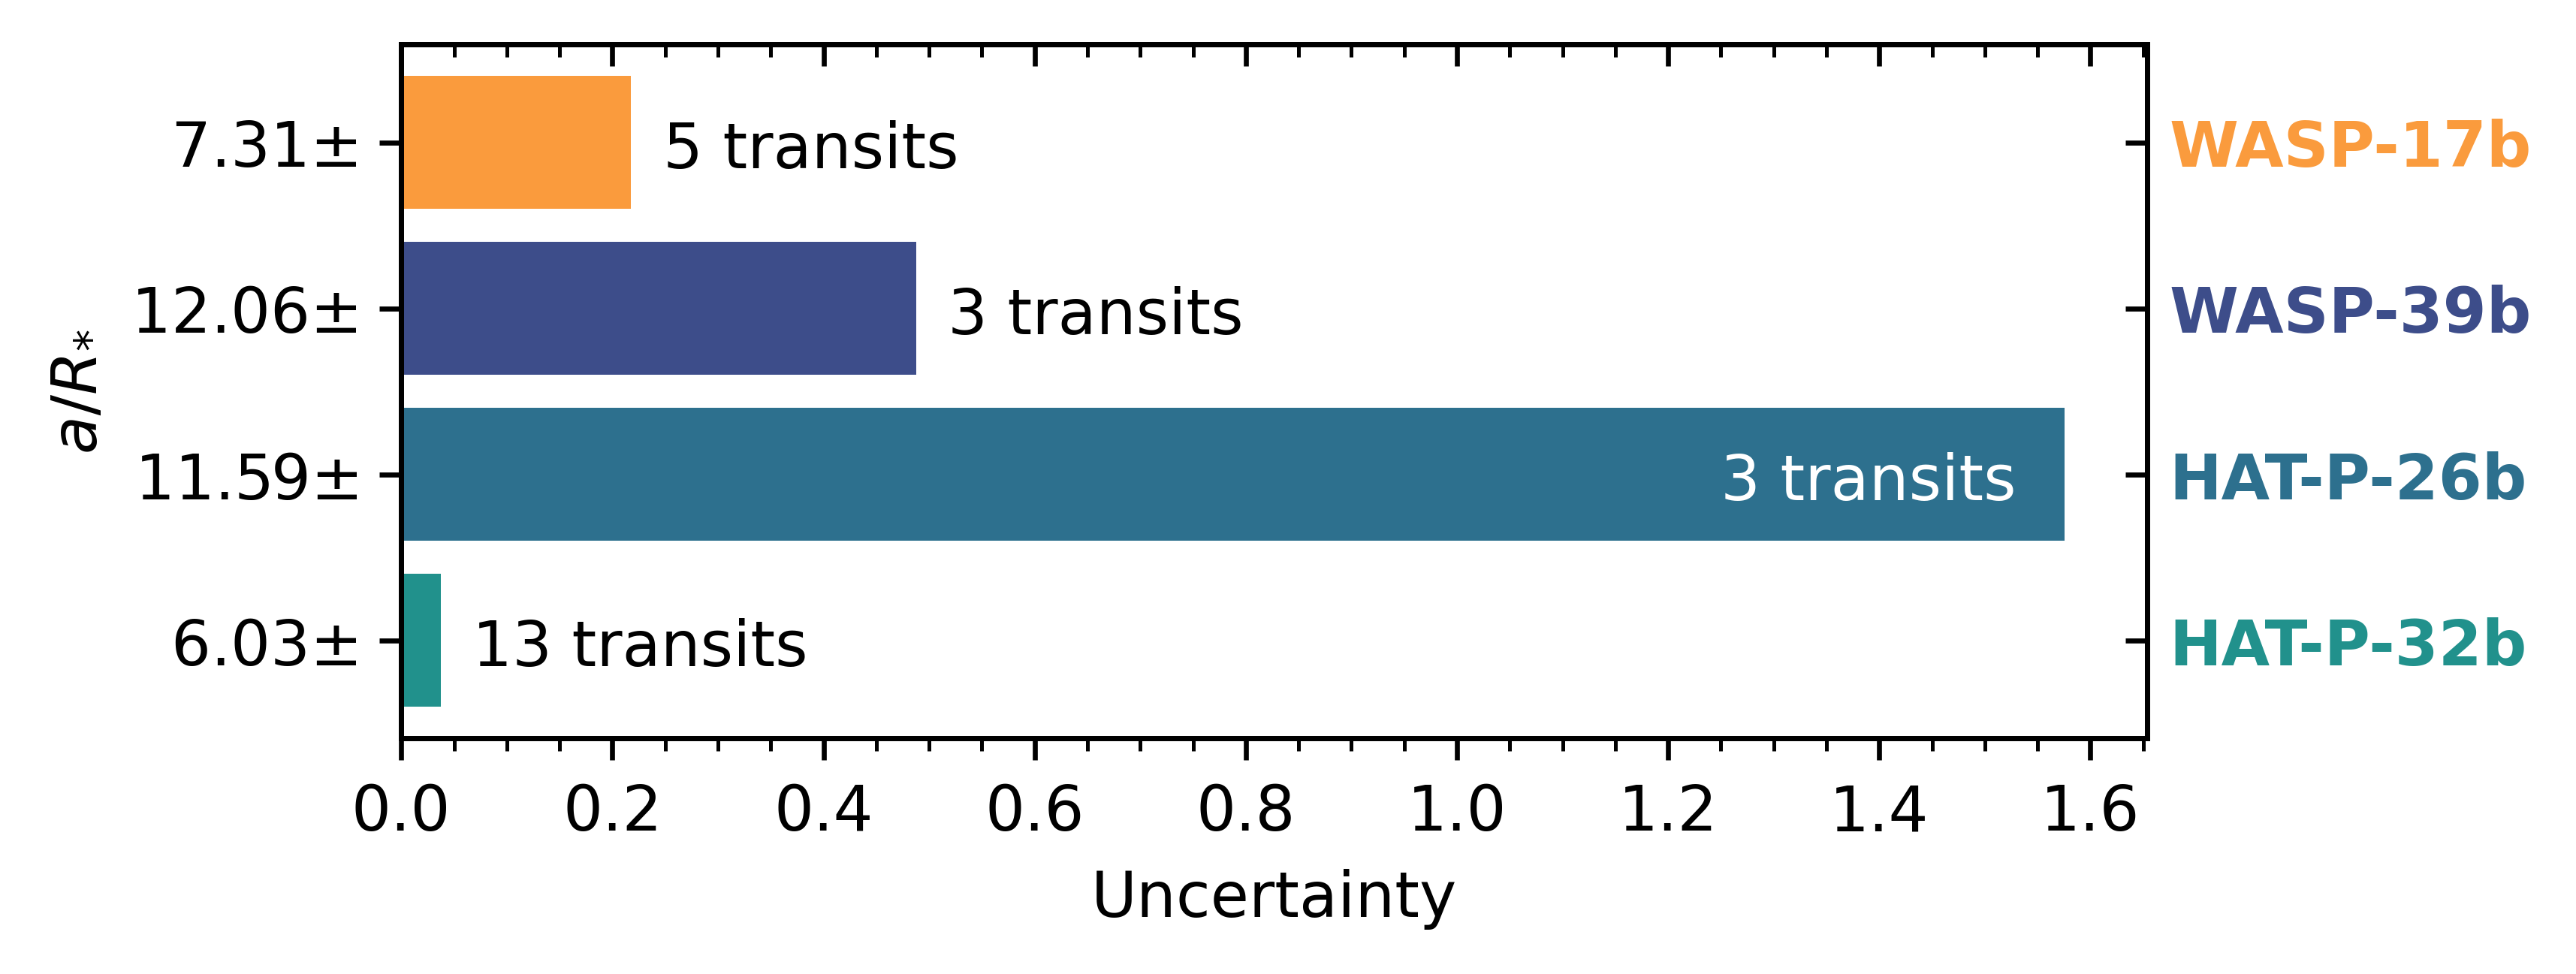

In [14]:
y_list = range(0, len(a_Rs_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list = []

a_Rs_obj = np.concatenate((a_Rs_list, np.vstack(a_Rs_ref_list)), axis=1, dtype=object)[::-1]
# a_Rs_obj = a_Rs_obj[a_Rs_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in a_Rs_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "HAT-P-26b":
        ax.text(1.25, (y-0.15), transit_text, color="white")
    elif author == "HAT-P-32b":
        ax.text(sigma+0.03, (y-0.15), transit_text)
    elif author == "WASP-17b":
        ax.text(sigma+0.03, (y-0.15), transit_text)
    elif "WASP-39b":
        ax.text(sigma+0.03, (y-0.15), transit_text)
    label = r"%.2f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)
    y+=1

    

ax.set_ylabel(r'$a/R_{*}$')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

HAT-P-32b 0.015686429867747265 0.008247418786619793
HAT-P-26b 0.12116828485016282 0.05722449180824006


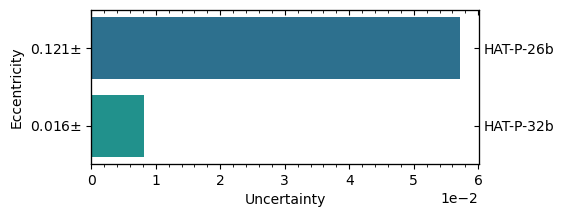

In [13]:
y_list = range(0, len(e_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
author_label = []
e_obj = np.concatenate((e_list, np.vstack(e_ref_list)), axis=1, dtype=object)
e_obj = e_obj[e_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in e_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.3f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    y += 1

ax.set_ylabel(r'Eccentricity')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label)


# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()